# Organic acid constants implementation

The 'minteq.v4.dat' database includes constants for some organic componds including organic acids.

From there the constants have been copied and included into 'vitens.dat' database.

To include them three edits need to be made. At the beginning and at the main block and in the name table with TA inmpact.
Only if the new compound is added everywhere the prgram will run without error message.
 
 

Editing the database files must be done with great care. One small thing at the wrong place will stop the phreeqpython code to detect it as a database. Instead of getting an error message that there is a mistake in the database it will say : no database loaded.



 

In [62]:
import phreeqpython

from phreeqpython import PhreeqPython

import os

pp = PhreeqPython()


# Get the default database path
#print("Default database file path:", pp.get_selected_output_file_name())


# Get the installation path of phreeqpython
phreeqpython_path = os.path.dirname(phreeqpython.__file__)
#print("PhreeqPython is installed at:", phreeqpython_path)


import numpy as np

#package to work with html documents
#import dash_html_components as html


#open system model

import pandas as pd




from matplotlib import pyplot as plt


# Set font globally
plt.rcParams['font.family'] = 'Arial'  # Replace 'Arial' with your desired font


# set global fontsize stuff


# type plt.rcParams.keys()   to get all settings


# https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

plt.rcParams.update({'font.size': 22,
                     #font.weight':'bold',
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18,
                     'lines.linewidth' :  4,
                     'axes.labelsize'  : 20.0,
                     'axes.titlesize':  20,
                     'figure.titlesize': 'x-large',
                     'legend.fontsize': 18.0,})




#import the package for carbonate system calculation chemistry

from phreeqpython import PhreeqPython



In [63]:
pp =PhreeqPython(database='minteq.v4_with_fix_pH_and_corrected_CO2.dat')

solution=pp.add_solution_simple({'NaHCO3':1},temperature=20)

#use another database with more organics


pp = PhreeqPython(database='minteq.v4_lukas_edit.dat')

# How much would acetate contribute to the alkalinity titration ?

All with alkalinity 50 meq/kgw

- solution 1 = pure cabonate alaklinity

- solution 2 = pure acetate alkalinity

- solution 3 = 1:1 mix

In [64]:
# define the concentrations of each pH buffering compound in the water sample

c_CA=50 #mmol/kgw

c_acetate=50 # mmol/kgw


temp=20


# set the Sodium moles and produce charge balance for oH-

solution1=pp.add_solution_simple({'NaHCO3':c_CA},temperature=temp, units='mmol')


#concentration CO2
p=415 # ppm

#partial pressure pCO2 in atm
pCO2=p*1e-6 


#phreeqc always uses log10 values
input_pCO2=np.log10(pCO2)
    
    
# equalize solution with CO2
# equilibrium with atmosphere
solution1.equalize(['CO2(g)'], [input_pCO2])


#take just a part of this solution

solution2=pp.add_solution_simple({'Na(Acetate)':c_acetate},temperature=temp, units='mmol')


#create mixed solution
# both half 
solution_mix=pp.add_solution_simple({'Na(Acetate)':c_acetate/2,'NaHCO3':c_CA/2 },temperature=temp, units='mmol')



#acid used for titration
# 1 liter of this solution
# like tiamo 0.02 mol/l

solution_acid=pp.add_solution_simple({'HCl':20},temperature=temp, units='mmol')






#pure water for dilution 
solution_zero = pp.add_solution_simple({},temperature=temp)

# Dilute the solutions

In [65]:
# take a subsmaple and fill up to a target volume

target_volume= 30 #ml

sample_volume= 5#ml 

#the dilution factor
dilution=target_volume/sample_volume


f1=sample_volume/target_volume

f2=(target_volume-sample_volume)/target_volume

# example 50% / 50%

solution1=solution1*f1+solution_zero*f2

solution2=solution2*f1+solution_zero*f2

solution_mix=solution_mix*f1+solution_zero*f2


# Add acid stepwise

In [66]:


# add acid stepwise 

# acid steps (like tiamo )
dx=0.01 #ml


pH_s1=[]

pH_s2=[]

pH_mix=[]

acid_s1=[]

acid_s2=[]

acid_mix=[]

volumes=[]

#starting volume of the titration
v_start=30.0 #ml
v=30.0 #ml

for item in range(6000):
    
    pH_s1.append(solution1.pH)
    
    pH_s2.append(solution2.pH)
    
    pH_mix.append(solution_mix.pH)

    acid_s1.append(item*dx)

    acid_s2.append(item*dx)
    
    acid_mix.append(item*dx)
    
    volumes.append(v)
    
    #solution1=solution1+dx*solution_acid

    # total volume (phreeqc always 1 liter)
    
    
    #resize the inputs to 1 liter 
    
    #numbers in ml
    total=v+dx
    
    #mixing fractions (they are always constant anyway)
    f1=v/total
    
    f2=dx/total
    
    #mix solutions
    
    solution1=solution1*f1+solution_acid*f2
    
    #solution1.add('HCl',0.1, 'mmol') # add 1 mmol of 
    
    solution2=solution2*f1+solution_acid*f2
    
    solution_mix=solution_mix*f1+solution_acid*f2
    
    #for the next iteration the total becomes the new volume
    v=total
    
    
    
    

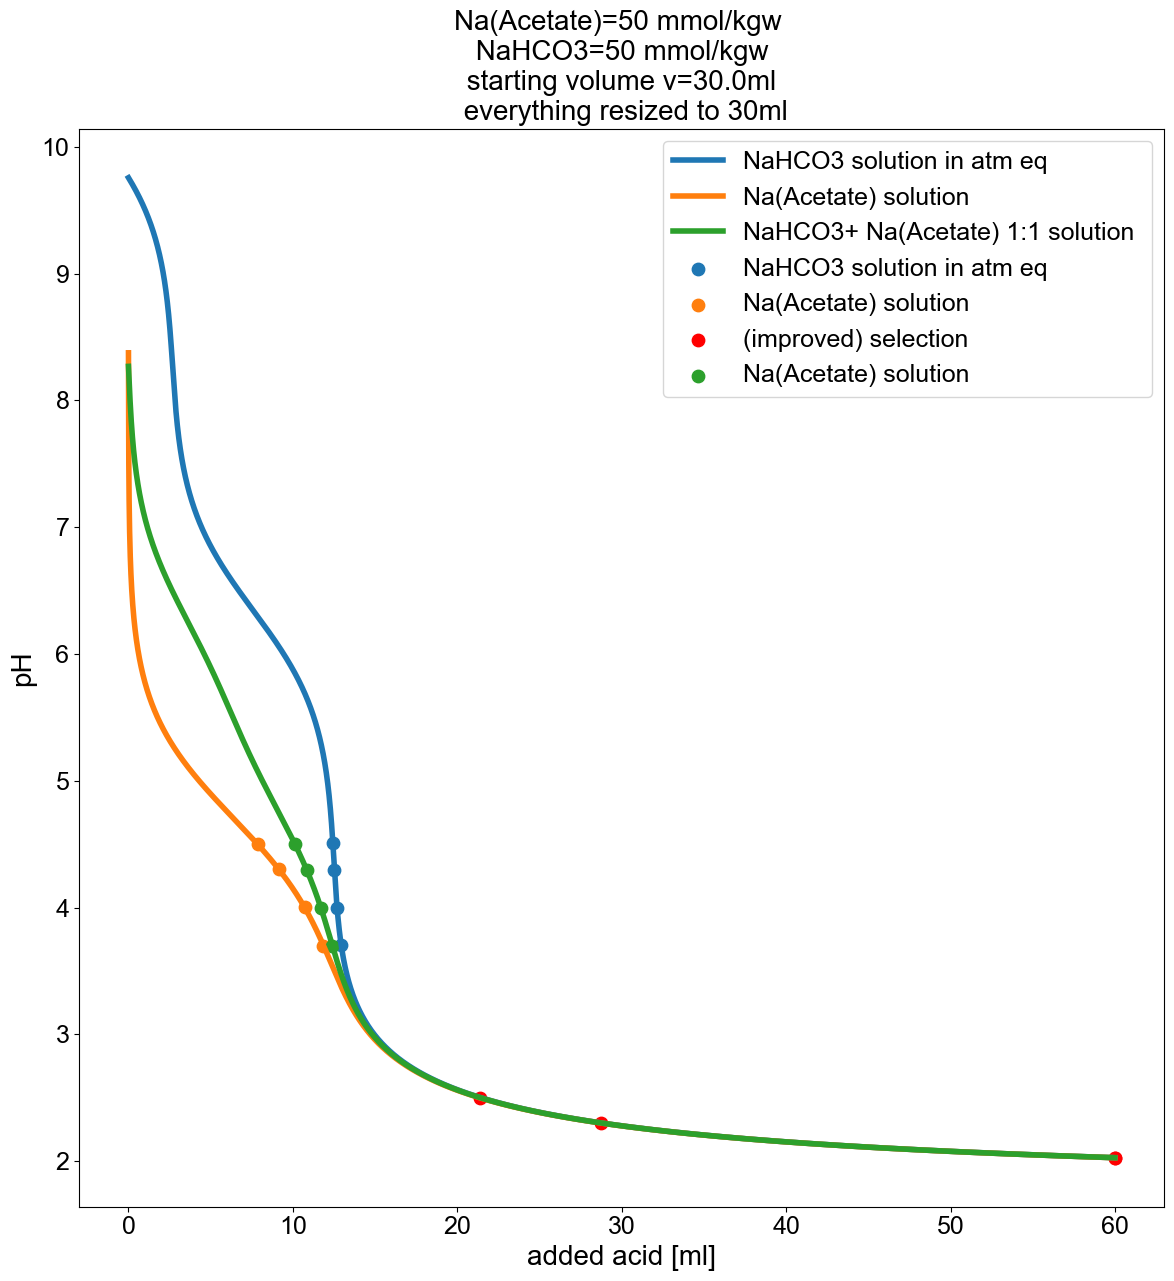

In [67]:
fig = plt.figure(figsize=[14,14])

plt.plot(acid_s1,pH_s1, label='NaHCO3 solution in atm eq')

plt.plot(acid_s2,pH_s2, label='Na(Acetate) solution ')

plt.plot(acid_mix,pH_mix, label='NaHCO3+ Na(Acetate) 1:1 solution ')

# plot points used for lin reg of forst

pH_s1_indx=[min(range(len(pH_s1)), key=lambda i: abs(pH_s1[i]-4.5)),
            min(range(len(pH_s1)), key=lambda i: abs(pH_s1[i]-4.3)),
            min(range(len(pH_s1)), key=lambda i: abs(pH_s1[i]-4.0)),
            min(range(len(pH_s1)), key=lambda i: abs(pH_s1[i]-3.7))]
            #min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-3.3)),
            #min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-3.0))]



pH_s2_indx=[min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-4.5)),
            min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-4.3)),
            min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-4.0)),
            min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-3.7))]
            #min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-3.3)),
            #min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-3.0)),
            #min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-2.7))]

pH_mix_indx=[min(range(len(pH_mix)), key=lambda i: abs(pH_mix[i]-4.5)),
            min(range(len(pH_mix)), key=lambda i: abs(pH_mix[i]-4.3)),
            min(range(len(pH_mix)), key=lambda i: abs(pH_mix[i]-4.0)),
            min(range(len(pH_mix)), key=lambda i: abs(pH_mix[i]-3.7))]
            #min(range(len(pH_mix)), key=lambda i: abs(pH_mix[i]-3.3)),
            #min(range(len(pH_mix)), key=lambda i: abs(pH_mix[i]-3.0)),
            #min(range(len(pH_mix)), key=lambda i: abs(pH_mix[i]-2.7))]
            
            
# apply lukas rule of thumb pH=pK-2
pH_s2_indx_improved=[min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-2.5)),
                    min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-2.3)),
                    min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-2.0)),
                    min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-1.7))]
                    #min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-3.3)),
                    #min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-3.0)),
                    #min(range(len(pH_s2)), key=lambda i: abs(pH_s2[i]-2.7))]
            



plt.scatter([acid_s1[x] for x in pH_s1_indx],[pH_s1[x] for x in pH_s1_indx] , label='NaHCO3 solution in atm eq',s=80)


plt.scatter([acid_s2[x] for x in pH_s2_indx],[pH_s2[x] for x in pH_s2_indx] , label='Na(Acetate) solution ',s=80)

plt.scatter([acid_s2[x] for x in pH_s2_indx_improved],[pH_s2[x] for x in pH_s2_indx_improved] , label='(improved) selection',s=80,color='red')

plt.scatter([acid_mix[x] for x in pH_mix_indx],[pH_mix[x] for x in pH_mix_indx] , label='Na(Acetate) solution ',s=80)




plt.ylabel('pH')

plt.xlabel('added acid [ml]')

plt.legend(loc='upper right')

plt.title('Na(Acetate)={:} mmol/kgw \n NaHCO3={:} mmol/kgw \n starting volume v={:}ml \n everything resized to 30ml'.format(c_CA, c_acetate, v_start))


plt.savefig('plots/titration-plot.pdf')  

In [68]:
min(pH_s2)

2.026661040573795

# calculate GRAN values


In [69]:
#calculate gran value

gran_s1=[]

gran_s2=[]

gran_mix=[]


for item in range(6000):
    gran_s1.append(10000*((acid_s1[item]+v_start)/v_start)*10**(-pH_s1[item]))
    
    gran_s2.append(10000*((acid_s2[item]+v_start)/v_start)*10**(-pH_s2[item]))
    
    gran_mix.append(10000*((acid_mix[item]+v_start)/v_start)*10**(-pH_mix[item]))
    
    
    

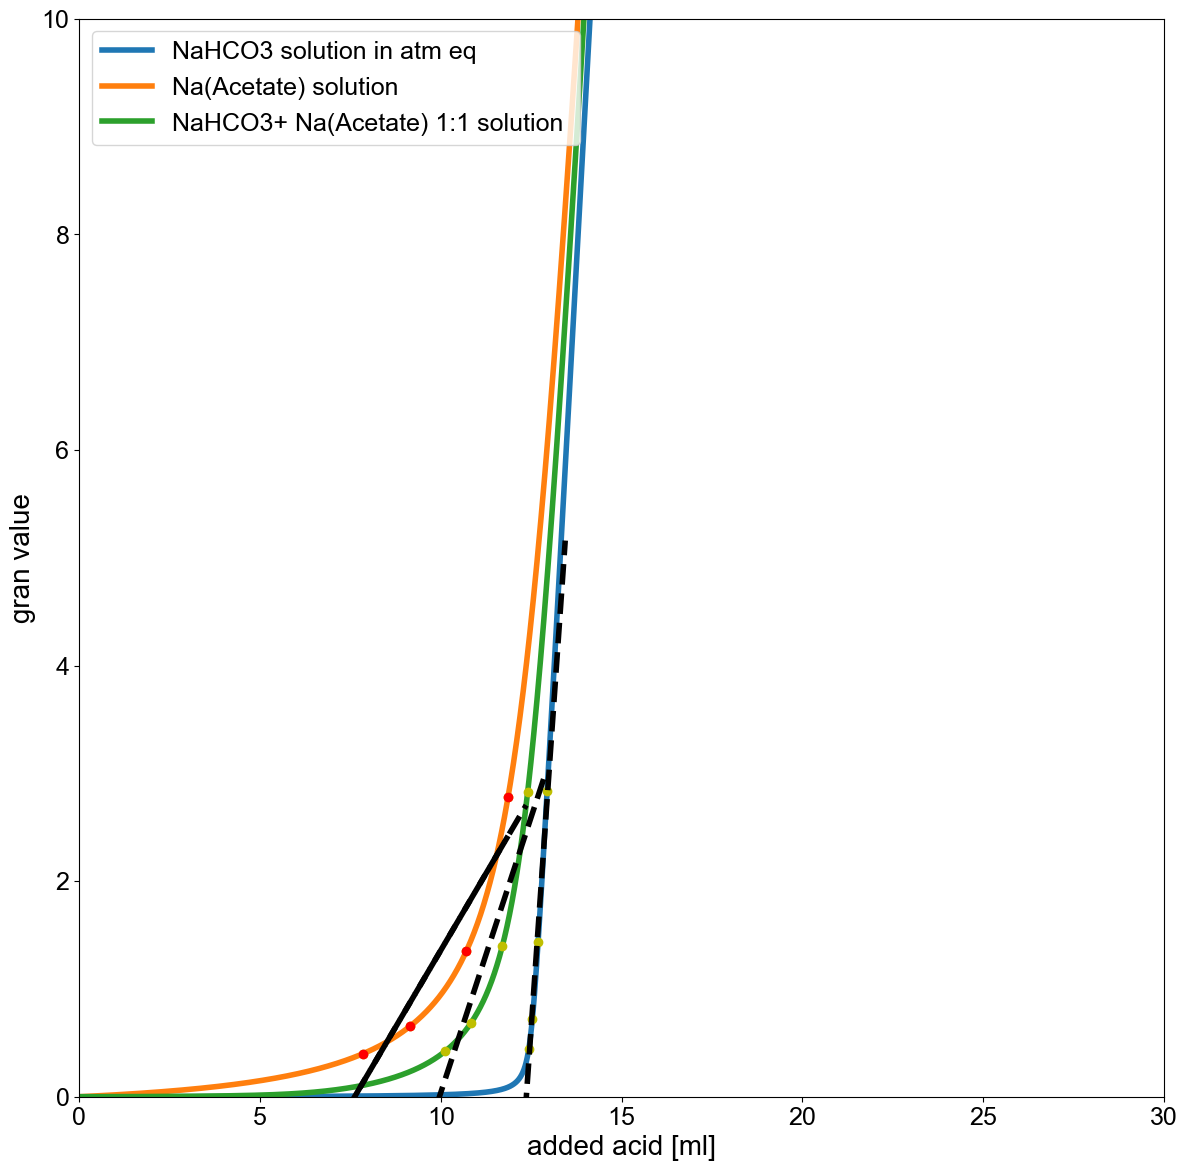

In [70]:
# plot the gran function against acid volume

fig = plt.figure(figsize=[14,14])

plt.plot(acid_s1,gran_s1, label='NaHCO3 solution in atm eq')
plt.plot(acid_s2,gran_s2,label='Na(Acetate) solution ')
plt.plot(acid_mix,gran_mix, label='NaHCO3+ Na(Acetate) 1:1 solution ')

plt.ylim([0,10])
plt.xlim([0,30])


plt.xlabel('added acid [ml]')
plt.ylabel('gran value')




#plt.scatter([acid_s1[x] for x in pH_s1_indx] ,[gran_s1[x] for x in pH_s1_indx], label='points NaHCO3 soluition')


#plt.scatter([acid_s2[x] for x in pH_s2_indx] ,[gran_s2[x] for x in pH_s2_indx], label='points Na(acetate) solution')


# linear regression for the points

x=[acid_s1[x] for x in pH_s1_indx]

y=[gran_s1[x] for x in pH_s1_indx]

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

#linear reg results
V_1=poly1d_fn.roots

# Extend the regression line
extra_range = 0.5
x_extended = np.array([[x[0] - extra_range], [x[-1] + extra_range]])



plt.plot(x,y, 'yo', x_extended, poly1d_fn(x_extended), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker




x=[acid_s2[x] for x in pH_s2_indx]

y=[gran_s2[x] for x in pH_s2_indx]

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

#linear reg results
V_2=poly1d_fn.roots

# Extend the regression line
extra_range = 0.5
x_extended = np.array([[x[0] - extra_range], [x[-1] + extra_range]])


plt.plot(x,y, 'yo', x_extended, poly1d_fn(x_extended), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker



#improved version with lower pH endpoints
x=[acid_s2[x] for x in pH_s2_indx]

y=[gran_s2[x] for x in pH_s2_indx]

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

#linear reg results
V_2=poly1d_fn.roots

# Extend the regression line
extra_range = 10
x_extended = np.array([[x[0] - extra_range], [x[-1] + 0]])

plt.plot(x,y, 'ro', x_extended, poly1d_fn(x_extended), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker



x=[acid_mix[x] for x in pH_mix_indx]

y=[gran_mix[x] for x in pH_mix_indx]

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

#linear reg rsults
V_mix=poly1d_fn.roots

# Extend the regression line
extra_range = 0.5
x_extended = np.array([[x[0] - extra_range], [x[-1] + extra_range]])


plt.plot(x,y, 'yo', x_extended, poly1d_fn(x_extended), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker


plt.legend(loc='upper left')

plt.savefig('plots/titration-with-organics.pdf')  



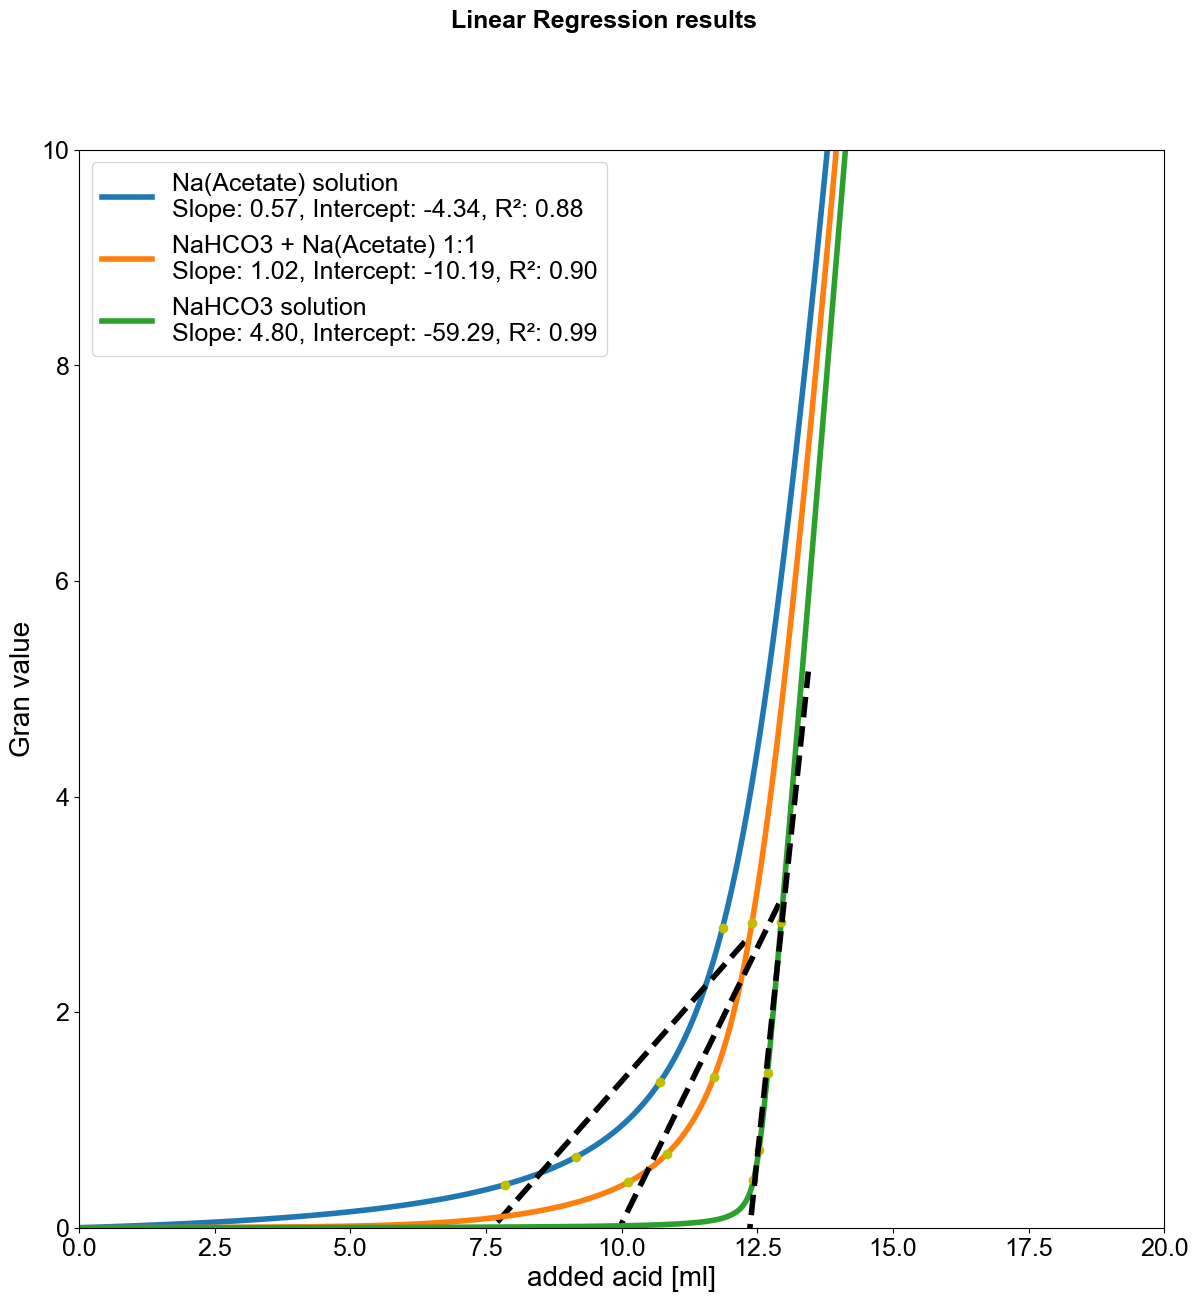

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the Gran function against acid volume
fig = plt.figure(figsize=[14,14])

fig.suptitle('Linear Regression results', fontsize=18, fontweight='bold')

# Regression parameters for Na(Acetate) solution
x = [acid_s2[idx] for idx in pH_s2_indx]
y = [gran_s2[idx] for idx in pH_s2_indx]
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)
slope_2, intercept_2 = coef
r_value_2 = np.corrcoef(x, y)[0, 1]**2
x_extended = np.array([x[0] - 0.5, x[-1] + 0.5])
plt.plot(acid_s2, gran_s2, label=f'Na(Acetate) solution\nSlope: {slope_2:.2f}, Intercept: {intercept_2:.2f}, R²: {r_value_2:.2f}')
plt.plot(x, y, 'yo', x_extended, poly1d_fn(x_extended), '--k')


# Regression parameters for NaHCO3 + Na(Acetate) mixture
x = [acid_mix[idx] for idx in pH_mix_indx]
y = [gran_mix[idx] for idx in pH_mix_indx]
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)
slope_mix, intercept_mix = coef
r_value_mix = np.corrcoef(x, y)[0, 1]**2
x_extended = np.array([x[0] - 0.5, x[-1] + 0.5])
plt.plot(acid_mix, gran_mix, label=f'NaHCO3 + Na(Acetate) 1:1\nSlope: {slope_mix:.2f}, Intercept: {intercept_mix:.2f}, R²: {r_value_mix:.2f}')
plt.plot(x, y, 'yo', x_extended, poly1d_fn(x_extended), '--k')


# Regression parameters for NaHCO3 solution
x = [acid_s1[idx] for idx in pH_s1_indx]
y = [gran_s1[idx] for idx in pH_s1_indx]
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)
slope_1, intercept_1 = coef
r_value_1 = np.corrcoef(x, y)[0, 1]**2
x_extended = np.array([x[0] - 0.5, x[-1] + 0.5])
plt.plot(acid_s1, gran_s1, label=f'NaHCO3 solution\nSlope: {slope_1:.2f}, Intercept: {intercept_1:.2f}, R²: {r_value_1:.2f}')
plt.plot(x, y, 'yo', x_extended, poly1d_fn(x_extended), '--k')


plt.ylim([0, 10])
plt.xlim([0, 20])
plt.xlabel('added acid [ml]')
plt.ylabel('Gran value')

# Show the legend and save the figure
plt.legend(loc='upper left')
plt.savefig('plots/titration-with-organics.pdf')
plt.show()


In [72]:
# get the index of pH values near to the forst ones

min(enumerate(pH_s1), key=lambda x: abs(x[1]-4.5))

min(enumerate(pH_s1), key=lambda x: abs(x[1]-4.3))

min(enumerate(pH_s1), key=lambda x: abs(x[1]-4.0))

min(enumerate(pH_s1), key=lambda x: abs(x[1]-3.7))


min(range(len(pH_s1)), key=lambda i: abs(pH_s1[i]-3.7))


1294

In [73]:
min(range(len(pH_s1)), key=lambda i: abs(pH_s1[i]-3.7))

1294

In [74]:
pH_s1[min(range(len(pH_s1)), key=lambda i: abs(pH_s1[i]-3.7))]

3.702356300559924

In [75]:
V_2[0]

np.float64(7.616710134070868)

# calculate the alkalinity

#TA= (0.005L*0.02 mol/L / 0.03 L)*Dilution = 50meq/L



In [76]:

#put everything in mol

def TA(volume_acid,c_acid,dil, volume_start):

    alk=((volume_acid*c_acid)/volume_start)*dil
    

    return alk


print('apparent alkalinity of pure Na(Acetate) solution TA={} ueq/kgw'.format(1e6*TA(V_2[0]/1000,0.02,dilution,0.03)))


print('apparent alkalinity of pure NaHCO3 solution TA={} ueq/kgw'.format(1e6*TA(V_1[0]/1000,0.02,dilution,0.03)))


print('apparent alkalinity of mix solution TA={} ueq/kgw'.format(1e6*TA(V_mix[0]/1000,0.02,dilution,0.03)))


apparent alkalinity of pure Na(Acetate) solution TA=30466.84053628347 ueq/kgw
apparent alkalinity of pure NaHCO3 solution TA=49456.55230083861 ueq/kgw
apparent alkalinity of mix solution TA=39844.77726353415 ueq/kgw


# Result

the R2 value of samples with high acetate concentration should be high because the gran function linear regression will not give a smooth line


The highest observed acetate measurement was 180 ppm


In [77]:
# highest acetate alkalinity

(180/59.04)*1000 

3048.7804878048782